In [1]:
import networkx as nx
import pandas as pd
from google.colab import files
files.upload()


Saving dolphins (1).edges to dolphins (1).edges


{'dolphins (1).edges': b'0\t10\n0\t14\n0\t15\n0\t40\n0\t42\n0\t47\n1\t17\n1\t19\n1\t26\n1\t27\n1\t28\n1\t36\n1\t41\n1\t54\n2\t10\n2\t42\n2\t44\n2\t61\n3\t8\n3\t14\n3\t59\n4\t51\n5\t9\n5\t13\n5\t56\n5\t57\n6\t9\n6\t13\n6\t17\n6\t54\n6\t56\n6\t57\n7\t19\n7\t27\n7\t30\n7\t40\n7\t54\n8\t20\n8\t28\n8\t37\n8\t45\n8\t59\n9\t13\n9\t17\n9\t32\n9\t41\n9\t57\n10\t29\n10\t42\n10\t47\n11\t51\n12\t33\n13\t17\n13\t32\n13\t41\n13\t54\n13\t57\n14\t16\n14\t24\n14\t33\n14\t34\n14\t37\n14\t38\n14\t40\n14\t43\n14\t50\n14\t52\n15\t18\n15\t24\n15\t40\n15\t45\n15\t55\n15\t59\n16\t20\n16\t33\n16\t37\n16\t38\n16\t50\n17\t22\n17\t25\n17\t27\n17\t31\n17\t57\n18\t20\n18\t21\n18\t24\n18\t29\n18\t45\n18\t51\n19\t30\n19\t54\n20\t28\n20\t36\n20\t38\n20\t44\n20\t47\n20\t50\n21\t29\n21\t33\n21\t37\n21\t45\n21\t51\n23\t36\n23\t45\n23\t51\n24\t29\n24\t45\n24\t51\n25\t26\n25\t27\n26\t27\n28\t30\n28\t47\n29\t35\n29\t43\n29\t45\n29\t51\n29\t52\n30\t42\n30\t47\n32\t60\n33\t34\n33\t37\n33\t38\n33\t40\n33\t43\n33\t50\n34\t37\n3

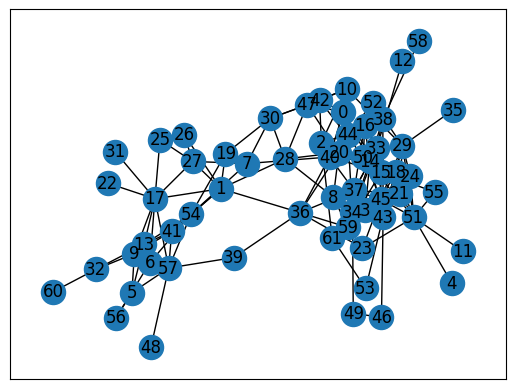

In [3]:
df=pd.read_csv('/content/dolphins (1).edges',sep='\t',names=['n1','n2'])
G=nx.from_pandas_edgelist(df,'n1','n2',create_using=nx.Graph())
nx.draw_networkx(G)


In [4]:
degree=nx.degree_centrality(G)
top_10_degree=sorted(degree.items(),key= lambda x:x[1],reverse=True)[0:10]


In [5]:
between=nx.betweenness_centrality(G)
top_10_between=sorted(between.items(),key= lambda x:x[1],reverse=True)[0:10]

In [6]:
close=nx.closeness_centrality(G)
top_10_close=sorted(close.items(),key= lambda x:x[1],reverse=True)[0:10]

In [7]:
page=nx.pagerank(G)
top_10_page=sorted(close.items(),key= lambda x:x[1],reverse=True)[0:10]

In [8]:
eigen=nx.eigenvector_centrality(G)
top_10_eigen=sorted(eigen.items(),key= lambda x:x[1],reverse=True)[0:10]

In [9]:
top_5_nodes_degree = [node for node, _ in top_10_degree][:5]
top_10_nodes_degree = [node for node, _ in top_10_degree][:10]



In [10]:
top_5_nodes_close = [node for node, _ in top_10_close][:5]
top_10_nodes_close = [node for node, _ in top_10_close][:10]

In [11]:
top_5_nodes_between = [node for node, _ in top_10_between][:5]
top_10_nodes_between = [node for node, _ in top_10_between][:10]

In [12]:
top_5_nodes_page = [node for node, _ in top_10_page][:5]
top_10_nodes_page = [node for node, _ in top_10_page][:10]

In [13]:
top_5_nodes_eigen = [node for node, _ in top_10_eigen][:5]
top_10_nodes_eigen = [node for node, _ in top_10_eigen][:10]

In [14]:
# my model is have threshold 0.1
import random
def run_IC_model(G, seeds, iterations=50):
    total_spread = 0
    for i in range(iterations):
        active = set(seeds)
        new_active = set(seeds)

        while new_active:
            activated_nodes_of_this_round = set()
            for node in new_active:
                neighbors = set(G.neighbors(node)) - active
                for neighbor in neighbors:
                    if random.random() < 0.1:
                        activated_nodes_of_this_round.add(neighbor)
                        active.add(neighbor)

            new_active = activated_nodes_of_this_round
        total_spread += len(active)
    return total_spread / iterations

In [15]:
degree5 = run_IC_model(G, top_5_nodes_degree)
degree10 = run_IC_model(G, top_10_nodes_degree)

print(f'degree5: {degree5}')
print(f'degree10: {degree10}')

degree5: 10.56
degree10: 18.82


In [16]:
close5 = run_IC_model(G, top_5_nodes_close)
close10 = run_IC_model(G, top_10_nodes_close)

print(f'degree5: {close5}')
print(f'degree5: {close10}')

degree5: 10.06
degree5: 16.86


In [17]:
between5 = run_IC_model(G, top_5_nodes_between)
between10 = run_IC_model(G, top_10_nodes_between)

print(f'degree5: {between5}')
print(f'degree5: {between10}')

degree5: 10.02
degree5: 18.82


In [18]:
eigen5 = run_IC_model(G, top_5_nodes_between)
eigen10 = run_IC_model(G, top_10_nodes_between)

print(f'degree5: {eigen5}')
print(f'degree5: {eigen10}')

degree5: 10.24
degree5: 17.86


In [19]:
page5 = run_IC_model(G, top_5_nodes_page)
page10 = run_IC_model(G, top_10_nodes_page)

print(f'degree5: {page5}')
print(f'degree5: {page10}')

degree5: 10.78
degree5: 17.04


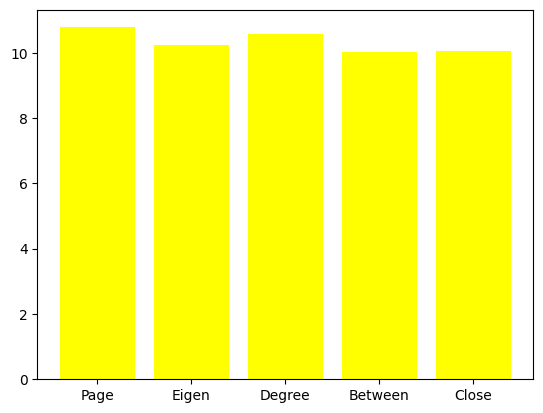

In [20]:
import matplotlib.pyplot as plt
categories = ['Page', 'Eigen', 'Degree', 'Between', 'Close']
values = [page5, eigen5, degree5, between5, close5]
plt.bar(categories, values, color='yellow')
plt.show()

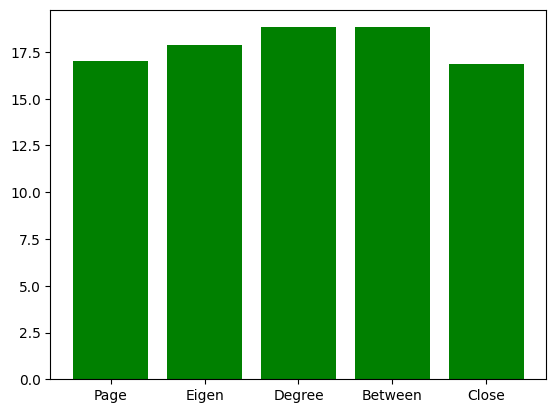

In [21]:
import matplotlib.pyplot as plt
categories = ['Page', 'Eigen', 'Degree', 'Between', 'Close']
values = [page10, eigen10, degree10, between10, close10]
plt.bar(categories, values, color='green')
plt.show()

In [22]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
communities_generator = nx.algorithms.community.girvan_newman(G)
top_level_communities = next(communities_generator)







In [23]:
partition = {}
for i, community in enumerate(top_level_communities):
    for node in community:
        partition[node] = i

In [24]:

centrality_measures = {
    'degree': {},
    'betweenness': {},
    'closeness': {},
    'pagerank':{},
    'eigenvector':{}
    }


for comm_id, nodes in partition.items():
    subgraph = G.subgraph(nodes)
    centrality_measures['degree'][comm_id] = nx.degree_centrality(subgraph)
    centrality_measures['betweenness'][comm_id] = nx.betweenness_centrality(subgraph)
    centrality_measures['closeness'][comm_id] = nx.closeness_centrality(subgraph)
    centrality_measures['pagerank'][comm_id] = nx.pagerank(subgraph)
    centrality_measures['eigenvector'][comm_id] = nx.eigenvector_centrality(subgraph)


In [25]:
for comm_id, centrality_dict in centrality_measures['degree'].items():
    sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    print(f'community{comm_id} - node{sorted_centrality[:5]}')


community0 - node[(0, 1)]
community2 - node[(0, 1)]
community3 - node[(0, 1)]
community4 - node[(0, 1)]
community8 - node[(0, 1)]
community10 - node[(0, 1)]
community11 - node[(0, 1)]
community12 - node[(0, 1)]
community14 - node[(0, 1)]
community15 - node[(0, 1)]
community16 - node[(0, 1)]
community18 - node[(0, 1)]
community20 - node[(0, 1)]
community21 - node[(0, 1)]
community23 - node[(0, 1)]
community24 - node[(0, 1)]
community28 - node[(0, 1)]
community29 - node[(0, 1)]
community30 - node[(0, 1)]
community33 - node[(0, 1)]
community34 - node[(0, 1)]
community35 - node[(0, 1)]
community36 - node[(0, 1)]
community37 - node[(0, 1)]
community38 - node[(0, 1)]
community40 - node[(0, 1)]
community42 - node[(0, 1)]
community43 - node[(0, 1)]
community44 - node[(0, 1)]
community45 - node[(0, 1)]
community46 - node[(0, 1)]
community47 - node[(0, 1)]
community49 - node[(0, 1)]
community50 - node[(0, 1)]
community51 - node[(0, 1)]
community52 - node[(0, 1)]
community53 - node[(0, 1)]
commun

In [26]:
for comm_id, centrality_dict in centrality_measures['degree'].items():
    sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    print(f'community{comm_id} - node{sorted_centrality[:10]}')


community0 - node[(0, 1)]
community2 - node[(0, 1)]
community3 - node[(0, 1)]
community4 - node[(0, 1)]
community8 - node[(0, 1)]
community10 - node[(0, 1)]
community11 - node[(0, 1)]
community12 - node[(0, 1)]
community14 - node[(0, 1)]
community15 - node[(0, 1)]
community16 - node[(0, 1)]
community18 - node[(0, 1)]
community20 - node[(0, 1)]
community21 - node[(0, 1)]
community23 - node[(0, 1)]
community24 - node[(0, 1)]
community28 - node[(0, 1)]
community29 - node[(0, 1)]
community30 - node[(0, 1)]
community33 - node[(0, 1)]
community34 - node[(0, 1)]
community35 - node[(0, 1)]
community36 - node[(0, 1)]
community37 - node[(0, 1)]
community38 - node[(0, 1)]
community40 - node[(0, 1)]
community42 - node[(0, 1)]
community43 - node[(0, 1)]
community44 - node[(0, 1)]
community45 - node[(0, 1)]
community46 - node[(0, 1)]
community47 - node[(0, 1)]
community49 - node[(0, 1)]
community50 - node[(0, 1)]
community51 - node[(0, 1)]
community52 - node[(0, 1)]
community53 - node[(0, 1)]
commun

In [27]:
for comm_id, centrality_dict in centrality_measures['betweenness'].items():
    sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    print(f'community{comm_id} - node{sorted_centrality[:5]}')

community0 - node[(0, 0.0)]
community2 - node[(0, 0.0)]
community3 - node[(0, 0.0)]
community4 - node[(0, 0.0)]
community8 - node[(0, 0.0)]
community10 - node[(0, 0.0)]
community11 - node[(0, 0.0)]
community12 - node[(0, 0.0)]
community14 - node[(0, 0.0)]
community15 - node[(0, 0.0)]
community16 - node[(0, 0.0)]
community18 - node[(0, 0.0)]
community20 - node[(0, 0.0)]
community21 - node[(0, 0.0)]
community23 - node[(0, 0.0)]
community24 - node[(0, 0.0)]
community28 - node[(0, 0.0)]
community29 - node[(0, 0.0)]
community30 - node[(0, 0.0)]
community33 - node[(0, 0.0)]
community34 - node[(0, 0.0)]
community35 - node[(0, 0.0)]
community36 - node[(0, 0.0)]
community37 - node[(0, 0.0)]
community38 - node[(0, 0.0)]
community40 - node[(0, 0.0)]
community42 - node[(0, 0.0)]
community43 - node[(0, 0.0)]
community44 - node[(0, 0.0)]
community45 - node[(0, 0.0)]
community46 - node[(0, 0.0)]
community47 - node[(0, 0.0)]
community49 - node[(0, 0.0)]
community50 - node[(0, 0.0)]
community51 - node[

In [28]:
for comm_id, centrality_dict in centrality_measures['betweenness'].items():
    sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    print(f'community{comm_id} - node{sorted_centrality[:10]}')

community0 - node[(0, 0.0)]
community2 - node[(0, 0.0)]
community3 - node[(0, 0.0)]
community4 - node[(0, 0.0)]
community8 - node[(0, 0.0)]
community10 - node[(0, 0.0)]
community11 - node[(0, 0.0)]
community12 - node[(0, 0.0)]
community14 - node[(0, 0.0)]
community15 - node[(0, 0.0)]
community16 - node[(0, 0.0)]
community18 - node[(0, 0.0)]
community20 - node[(0, 0.0)]
community21 - node[(0, 0.0)]
community23 - node[(0, 0.0)]
community24 - node[(0, 0.0)]
community28 - node[(0, 0.0)]
community29 - node[(0, 0.0)]
community30 - node[(0, 0.0)]
community33 - node[(0, 0.0)]
community34 - node[(0, 0.0)]
community35 - node[(0, 0.0)]
community36 - node[(0, 0.0)]
community37 - node[(0, 0.0)]
community38 - node[(0, 0.0)]
community40 - node[(0, 0.0)]
community42 - node[(0, 0.0)]
community43 - node[(0, 0.0)]
community44 - node[(0, 0.0)]
community45 - node[(0, 0.0)]
community46 - node[(0, 0.0)]
community47 - node[(0, 0.0)]
community49 - node[(0, 0.0)]
community50 - node[(0, 0.0)]
community51 - node[

In [31]:
for comm_id, centrality_dict in centrality_measures['pagerank'].items():
    sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    print(f'community{comm_id} - node{sorted_centrality[:5]}')

community0 - node[(0, 1.0)]
community2 - node[(0, 1.0)]
community3 - node[(0, 1.0)]
community4 - node[(0, 1.0)]
community8 - node[(0, 1.0)]
community10 - node[(0, 1.0)]
community11 - node[(0, 1.0)]
community12 - node[(0, 1.0)]
community14 - node[(0, 1.0)]
community15 - node[(0, 1.0)]
community16 - node[(0, 1.0)]
community18 - node[(0, 1.0)]
community20 - node[(0, 1.0)]
community21 - node[(0, 1.0)]
community23 - node[(0, 1.0)]
community24 - node[(0, 1.0)]
community28 - node[(0, 1.0)]
community29 - node[(0, 1.0)]
community30 - node[(0, 1.0)]
community33 - node[(0, 1.0)]
community34 - node[(0, 1.0)]
community35 - node[(0, 1.0)]
community36 - node[(0, 1.0)]
community37 - node[(0, 1.0)]
community38 - node[(0, 1.0)]
community40 - node[(0, 1.0)]
community42 - node[(0, 1.0)]
community43 - node[(0, 1.0)]
community44 - node[(0, 1.0)]
community45 - node[(0, 1.0)]
community46 - node[(0, 1.0)]
community47 - node[(0, 1.0)]
community49 - node[(0, 1.0)]
community50 - node[(0, 1.0)]
community51 - node[

In [32]:
for comm_id, centrality_dict in centrality_measures['pagerank'].items():
    sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    print(f'community{comm_id} - node{sorted_centrality[:10]}')

community0 - node[(0, 1.0)]
community2 - node[(0, 1.0)]
community3 - node[(0, 1.0)]
community4 - node[(0, 1.0)]
community8 - node[(0, 1.0)]
community10 - node[(0, 1.0)]
community11 - node[(0, 1.0)]
community12 - node[(0, 1.0)]
community14 - node[(0, 1.0)]
community15 - node[(0, 1.0)]
community16 - node[(0, 1.0)]
community18 - node[(0, 1.0)]
community20 - node[(0, 1.0)]
community21 - node[(0, 1.0)]
community23 - node[(0, 1.0)]
community24 - node[(0, 1.0)]
community28 - node[(0, 1.0)]
community29 - node[(0, 1.0)]
community30 - node[(0, 1.0)]
community33 - node[(0, 1.0)]
community34 - node[(0, 1.0)]
community35 - node[(0, 1.0)]
community36 - node[(0, 1.0)]
community37 - node[(0, 1.0)]
community38 - node[(0, 1.0)]
community40 - node[(0, 1.0)]
community42 - node[(0, 1.0)]
community43 - node[(0, 1.0)]
community44 - node[(0, 1.0)]
community45 - node[(0, 1.0)]
community46 - node[(0, 1.0)]
community47 - node[(0, 1.0)]
community49 - node[(0, 1.0)]
community50 - node[(0, 1.0)]
community51 - node[

In [33]:
for comm_id, centrality_dict in centrality_measures['closeness'].items():
    sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    print(f'community{comm_id} - node{sorted_centrality[:5]}')

community0 - node[(0, 0.0)]
community2 - node[(0, 0.0)]
community3 - node[(0, 0.0)]
community4 - node[(0, 0.0)]
community8 - node[(0, 0.0)]
community10 - node[(0, 0.0)]
community11 - node[(0, 0.0)]
community12 - node[(0, 0.0)]
community14 - node[(0, 0.0)]
community15 - node[(0, 0.0)]
community16 - node[(0, 0.0)]
community18 - node[(0, 0.0)]
community20 - node[(0, 0.0)]
community21 - node[(0, 0.0)]
community23 - node[(0, 0.0)]
community24 - node[(0, 0.0)]
community28 - node[(0, 0.0)]
community29 - node[(0, 0.0)]
community30 - node[(0, 0.0)]
community33 - node[(0, 0.0)]
community34 - node[(0, 0.0)]
community35 - node[(0, 0.0)]
community36 - node[(0, 0.0)]
community37 - node[(0, 0.0)]
community38 - node[(0, 0.0)]
community40 - node[(0, 0.0)]
community42 - node[(0, 0.0)]
community43 - node[(0, 0.0)]
community44 - node[(0, 0.0)]
community45 - node[(0, 0.0)]
community46 - node[(0, 0.0)]
community47 - node[(0, 0.0)]
community49 - node[(0, 0.0)]
community50 - node[(0, 0.0)]
community51 - node[

In [34]:
for comm_id, centrality_dict in centrality_measures['closeness'].items():
    sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    print(f'community{comm_id} - node{sorted_centrality[:10]}')

community0 - node[(0, 0.0)]
community2 - node[(0, 0.0)]
community3 - node[(0, 0.0)]
community4 - node[(0, 0.0)]
community8 - node[(0, 0.0)]
community10 - node[(0, 0.0)]
community11 - node[(0, 0.0)]
community12 - node[(0, 0.0)]
community14 - node[(0, 0.0)]
community15 - node[(0, 0.0)]
community16 - node[(0, 0.0)]
community18 - node[(0, 0.0)]
community20 - node[(0, 0.0)]
community21 - node[(0, 0.0)]
community23 - node[(0, 0.0)]
community24 - node[(0, 0.0)]
community28 - node[(0, 0.0)]
community29 - node[(0, 0.0)]
community30 - node[(0, 0.0)]
community33 - node[(0, 0.0)]
community34 - node[(0, 0.0)]
community35 - node[(0, 0.0)]
community36 - node[(0, 0.0)]
community37 - node[(0, 0.0)]
community38 - node[(0, 0.0)]
community40 - node[(0, 0.0)]
community42 - node[(0, 0.0)]
community43 - node[(0, 0.0)]
community44 - node[(0, 0.0)]
community45 - node[(0, 0.0)]
community46 - node[(0, 0.0)]
community47 - node[(0, 0.0)]
community49 - node[(0, 0.0)]
community50 - node[(0, 0.0)]
community51 - node[

In [35]:
for comm_id, centrality_dict in centrality_measures['eigenvector'].items():
    sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    print(f'community{comm_id} - node{sorted_centrality[:5]}')

community0 - node[(0, 1.0)]
community2 - node[(0, 1.0)]
community3 - node[(0, 1.0)]
community4 - node[(0, 1.0)]
community8 - node[(0, 1.0)]
community10 - node[(0, 1.0)]
community11 - node[(0, 1.0)]
community12 - node[(0, 1.0)]
community14 - node[(0, 1.0)]
community15 - node[(0, 1.0)]
community16 - node[(0, 1.0)]
community18 - node[(0, 1.0)]
community20 - node[(0, 1.0)]
community21 - node[(0, 1.0)]
community23 - node[(0, 1.0)]
community24 - node[(0, 1.0)]
community28 - node[(0, 1.0)]
community29 - node[(0, 1.0)]
community30 - node[(0, 1.0)]
community33 - node[(0, 1.0)]
community34 - node[(0, 1.0)]
community35 - node[(0, 1.0)]
community36 - node[(0, 1.0)]
community37 - node[(0, 1.0)]
community38 - node[(0, 1.0)]
community40 - node[(0, 1.0)]
community42 - node[(0, 1.0)]
community43 - node[(0, 1.0)]
community44 - node[(0, 1.0)]
community45 - node[(0, 1.0)]
community46 - node[(0, 1.0)]
community47 - node[(0, 1.0)]
community49 - node[(0, 1.0)]
community50 - node[(0, 1.0)]
community51 - node[

In [36]:
for comm_id, centrality_dict in centrality_measures['eigenvector'].items():
    sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    print(f'community{comm_id} - node{sorted_centrality[:10]}')

community0 - node[(0, 1.0)]
community2 - node[(0, 1.0)]
community3 - node[(0, 1.0)]
community4 - node[(0, 1.0)]
community8 - node[(0, 1.0)]
community10 - node[(0, 1.0)]
community11 - node[(0, 1.0)]
community12 - node[(0, 1.0)]
community14 - node[(0, 1.0)]
community15 - node[(0, 1.0)]
community16 - node[(0, 1.0)]
community18 - node[(0, 1.0)]
community20 - node[(0, 1.0)]
community21 - node[(0, 1.0)]
community23 - node[(0, 1.0)]
community24 - node[(0, 1.0)]
community28 - node[(0, 1.0)]
community29 - node[(0, 1.0)]
community30 - node[(0, 1.0)]
community33 - node[(0, 1.0)]
community34 - node[(0, 1.0)]
community35 - node[(0, 1.0)]
community36 - node[(0, 1.0)]
community37 - node[(0, 1.0)]
community38 - node[(0, 1.0)]
community40 - node[(0, 1.0)]
community42 - node[(0, 1.0)]
community43 - node[(0, 1.0)]
community44 - node[(0, 1.0)]
community45 - node[(0, 1.0)]
community46 - node[(0, 1.0)]
community47 - node[(0, 1.0)]
community49 - node[(0, 1.0)]
community50 - node[(0, 1.0)]
community51 - node[

In [39]:

def select_seed_nodes_5(communities):
    selected_nodes = []
    for community in communities:
        subgraph = G.subgraph(community)
        degree_centrality = nx.degree_centrality(subgraph)
        sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]
        selected_nodes.extend(sorted_nodes)
        if len(selected_nodes) >= 5:
            return selected_nodes[:5]
    return selected_nodes





In [40]:
communities_gn = list(nx.algorithms.community.girvan_newman(G))
top_level_communities_gn = next(iter(communities_gn))
seeds_gn_5 = select_seed_nodes_5(top_level_communities_gn)

In [41]:
communities_louvain = nx.algorithms.community.louvain_communities(G, seed=5)
seeds_louvain_5 = select_seed_nodes_5(communities_louvain)

In [42]:
spread_gn_5 = run_IC_model(G, seeds_gn_5)
spread_louvain_5 = run_IC_model(G, seeds_louvain_5)

In [43]:

print(f' GirvanNewman seed nodes: {spread_gn_5}')
print(f' Louvain seed nodes: {spread_louvain_5}')

 GirvanNewman seed nodes: 11.14
 Louvain seed nodes: 9.16


In [47]:

def select_seed_nodes_10(communities):
    selected_nodes = []
    for community in communities:
        subgraph = G.subgraph(community)
        degree_centrality = nx.degree_centrality(subgraph)
        sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]
        selected_nodes.extend(sorted_nodes)
        if len(selected_nodes) >= 10:
            return selected_nodes[:10]
    return selected_nodes


In [48]:
communities_gn = list(nx.algorithms.community.girvan_newman(G))
top_level_communities_gn = next(iter(communities_gn))
seeds_gn_10 = select_seed_nodes_10(top_level_communities_gn)

In [49]:

communities_louvain = nx.algorithms.community.louvain_communities(G, seed=10)
seeds_louvain_10 = select_seed_nodes_10(communities_louvain)

In [50]:
spread_gn_10 = run_IC_model(G, seeds_gn_10)
spread_louvain_10 = run_IC_model(G, seeds_louvain_10)

In [51]:

print(f' GirvanNewman seed nodes: {spread_gn_10}')
print(f' Louvain seed nodes: {spread_louvain_10}')

 GirvanNewman seed nodes: 18.48
 Louvain seed nodes: 15.18


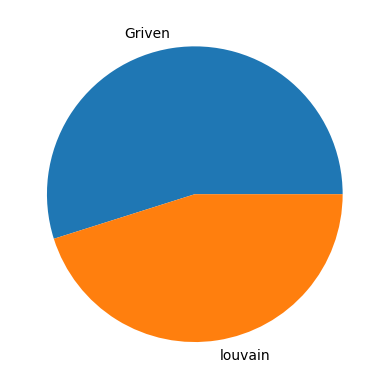

In [44]:
category=['Griven','louvain']
values=[spread_gn_5,spread_louvain_5]
plt.pie(values,labels=category)
plt.show()

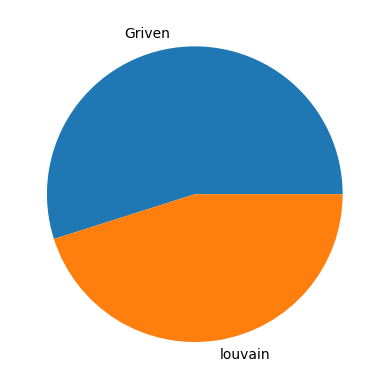

In [52]:
category=['Griven','louvain']
values=[spread_gn_10,spread_louvain_10]
plt.pie(values,labels=category)
plt.show()

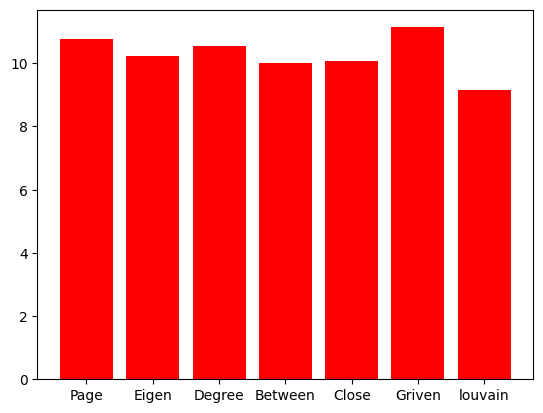

In [53]:
categories = ['Page', 'Eigen', 'Degree', 'Between', 'Close','Griven','louvain']
values = [page5, eigen5, degree5, between5, close5,spread_gn_5,spread_louvain_5]
plt.bar(categories, values, color='red')
plt.show()

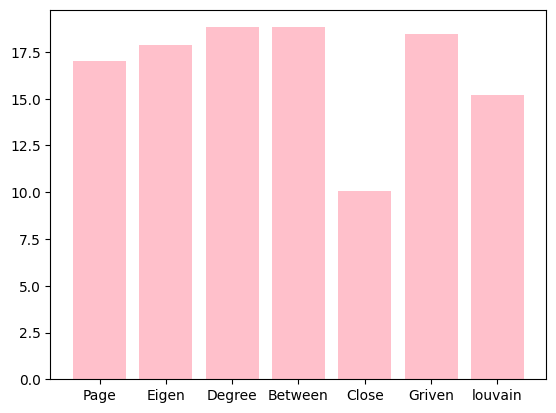

In [54]:
categories = ['Page', 'Eigen', 'Degree', 'Between', 'Close','Griven','louvain']
values = [page10, eigen10, degree10, between10, close5,spread_gn_10,spread_louvain_10]
plt.bar(categories, values, color='pink')
plt.show()


In [55]:
'thanks for your attention'

'thanks for your attention'